# Statistical distributions

The generation of random samples that follow a specific data distribution is very important in many fields.
This is why *ironArray* supports many of the most used statistical distributions (Uniform, Normal, Exponential, Binomial, Bernoulli, Poisson...).

In this tutorial, we will see how to generate random samples of these distributions using *ironArray* and we will compare them against the  *NumPy* library.

## Generating random samples

In this example, we are going to generate a random sample of the exponential distribution, whose distribution function is

$$ f(x, \lambda) = \begin{cases} \lambda e^{-\lambda x} & x \geq 0 \\ 0 & x < 0 \\ \end{cases} $$

with $\lambda = 5$.

In [1]:
import iarray as ia
import numpy as np

In [2]:
%%time
x = ia.random.exponential((5000, 10000), 5)

CPU times: user 890 ms, sys: 248 ms, total: 1.14 s
Wall time: 47.1 ms


## Comparing against NumPy

To check the quality of the random generator inside ironArray, let's create a random sample from the same distribution using NumPy.

In [3]:
%%time
y = np.random.exponential(5, 5000 * 10000).reshape(5000, 10000)

CPU times: user 525 ms, sys: 38 ms, total: 563 ms
Wall time: 562 ms


[Incidentally, see how ironArray constructor is much faster than ironArray; this is due to the fact that ironArray uses multithreading whenever a new array is built.  See more about speed in the benchmarks section of these docs.]

Then we extract arbitrary slices (of the same size) from each container.

In [4]:
x2 = x[:500, 1000:1500].data.flatten()
y2 = y[1000:1500, 3000:3500].flatten()

Now, we can visually check that the two samples come from the same distribution by representing their histograms.

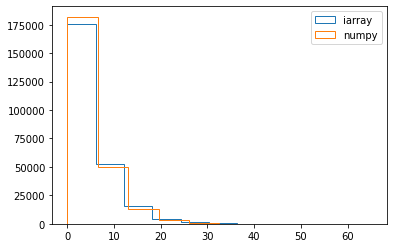

In [5]:
import matplotlib.pyplot as plt

plt.hist(x2, histtype='step', label="iarray")
plt.hist(y2, histtype='step', label="numpy")

plt.legend()
plt.show()

Finally, we can mathematically check that the two samples come from the same distribution
applying the Kolmogorov-Smirnov test. To apply the test, we have to assume that the two samples come
 from the same distribution.

In [6]:
from scipy.stats import kstest


statistic, pvalue = kstest(x2, y2)

print(f"D:       {statistic:.4f}")
print(f"p-value: {pvalue:.4f}")

D:       0.0024
p-value: 0.4908


As can be seen, since the p-value is large ($>0.05$), the samples belong to the same distribution with more than 95% of likelihood.

